# Translational Neuromodelling Exercise 1
## 1.1 Maximum Likelihood and Overfitting

In [245]:
using Pkg ; Pkg.add("Distributions")
using Random
using Distributions

Pkg.add("Optim"); using Optim
Pkg.add("NLSolversBase"); using NLSolversBase
using LinearAlgebra: diag
Random.seed!(0); 

Pkg.add("Plots"); using Plots
Pkg.add("Polynomials"); using Polynomials

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


### c)

In [130]:
theta0 = 0.3
theta1 = -0.1
theta2 = 0.5
var = 0.001
x = collect(-0.5:0.1:0.2)

# normal distributed noise
e = randn(size(x)) * var

print("white noise: ", e)

white noise: [3.6377340252037755e-5, 0.00022021305815094099, 3.25096081213656e-5, 0.001742666564128858, -0.0019691393508402717, -0.0016261271277469595, 0.0005445481427828921, -0.0005229809394742467]

In [147]:
function quadraticModel(x, e)
    return repeat([theta0], length(x))  + (theta1 * x) + (theta2 * (x).^2) + e
end  

quadraticModel (generic function with 1 method)

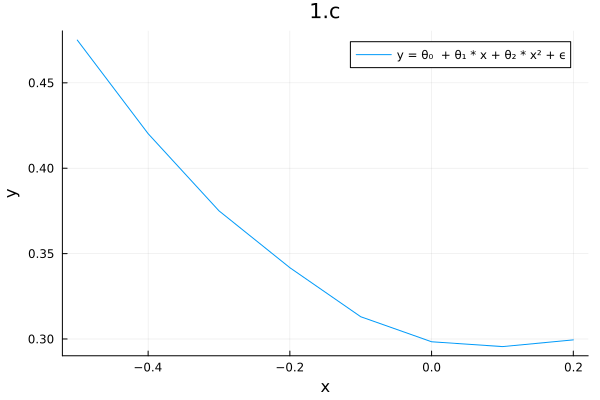

In [132]:
y = quadraticModel(x, e)
plot(x, y, title="1.c", xlabel= "x", ylabel="y", label = "y = θ₀  + θ₁ * x + θ₂ * x² + ϵ")

### d) ML estimator 
Take the ML estimator for the Pth-order model derived in (b), set P to 2 and apply it to the data y you generated in (c). Repeat this process for P = 1 and P = 7. What do you notice when comparing the ML parameter estimates to their true values from (c)? What do you notice about the value of the log-likelihood function at the ML solution for different values of P ?

### Polynomials fit method
Fit a polynomial (of degree deg) to x and y using polynomial interpolation or a (weighted) least-squares approximation.

In [127]:
f1 = Polynomials.fit(x, y, 1) 
f2 = Polynomials.fit(x, y, 2) # degree = 2
f7 = Polynomials.fit(x, y, 7) # degree = 7

println(f1)
println(f2)
println(f7)

0.314688 - 0.25146*x
0.299636 - 0.10094*x + 0.501735*x^2
0.297819 - 0.0918904*x + 0.686913*x^2 + 0.728145*x^3 - 0.674274*x^4 - 20.9581*x^5 - 68.2894*x^6 - 64.4944*x^7


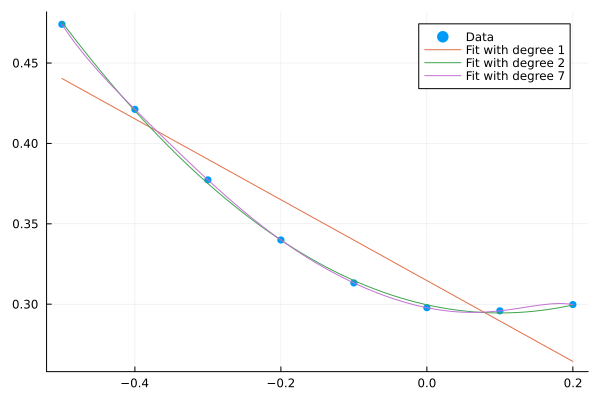

In [63]:
scatter(x, y, markerstrokewidth=0, label="Data")
plot!(f1, extrema(x)..., label="Fit with degree 1")
plot!(f2, extrema(x)..., label="Fit with degree 2")
plot!(f7, extrema(x)..., label="Fit with degree 7")

### Log-Likelihood

In [101]:
N = length(x)
f2_x = zeros(N)
f1_x = zeros(N)
f7_x = zeros(N)

for i = 1:N
    f2_x[i] = f2(x[i])
    f1_x[i] = f1(x[i])
    f7_x[i] = f7(x[i])
end

In [126]:
LL2 = -N*log(sqrt(2*π*var)) - (1/2/var)*sum((y - f2_x).^2)
LL1 = -N*log(sqrt(2*π*var)) - (1/2/var)*sum((y - f1_x).^2)
LL7 = -N*log(sqrt(2*π*var)) - (1/2/var)*sum((y - f7_x).^2)
println(LL2)
println(LL1)
println(LL7)

20.271837075263043
18.157238017879113
20.279512850291166


### e)
Now, increase x from -0.5 to 0.5 in steps of 0.01, but keep the values of θ₀ to θ₁ and σ₂ the same as above.  

In [155]:
x = collect(-0.5:0.01:0.5)
e = randn(length(x)) * var
y = quadraticModel(x,e)

# keep p1, p2, p7 same as in (d)
N = length(x)
f2_x = zeros(N)
f1_x = zeros(N)
f7_x = zeros(N)

for i = 1:N
    f2_x[i] = f2(x[i])
    f1_x[i] = f1(x[i])
    f7_x[i] = f7(x[i])
end

LL2 = -N*log(sqrt(2*π*var)) - (1/2/var)*sum((y - f2_x).^2)
LL1 = -N*log(sqrt(2*π*var)) - (1/2/var)*sum((y - f1_x).^2)
LL7 = -N*log(sqrt(2*π*var)) - (1/2/var)*sum((y - f7_x).^2)

println(LL2)
println(LL1)
println(LL7)

255.96881819385143
44.98976005875102
-9455.604099681406


### f)

In [171]:
N = 100
f2Record = []
f1Record = []
f7Record = []

for i = 1:N
    e = randn(length(x)) * var
    y = quadraticModel(x,e)
    f2 = Polynomials.fit(x, y, 2) 
    f1 = Polynomials.fit(x, y, 1) 
    f7 = Polynomials.fit(x, y, 7) 
    
    push!(f2Record,f2[0])
    push!(f2Record,f2[1])
    push!(f2Record,f2[2])
    
    push!(f1Record,f2[0])
    push!(f1Record,f2[1])
    
    push!(f7Record,f7[0])
    push!(f7Record,f7[1])
    push!(f7Record,f7[2])
    push!(f7Record,f7[3])
    push!(f7Record,f7[4])
    push!(f7Record,f7[5])
    push!(f7Record,f7[7])

end

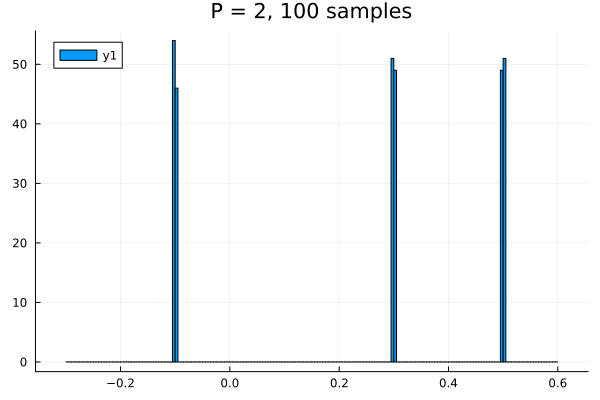

In [198]:
histogram(f2Record, bins = -0.3:0.005:0.6)
title!("P = 2, 100 samples")

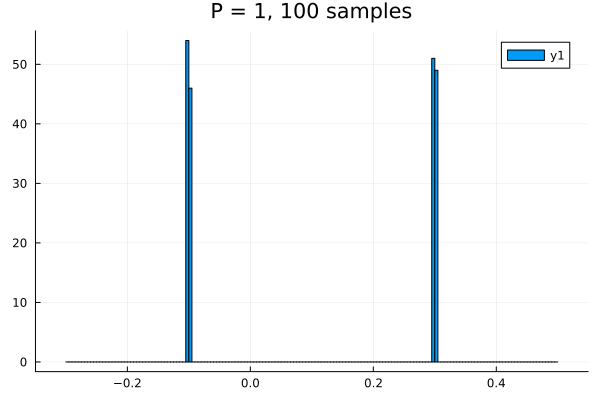

In [197]:
histogram(f1Record, bins=-0.3:0.005:0.5)
title!("P = 1, 100 samples")

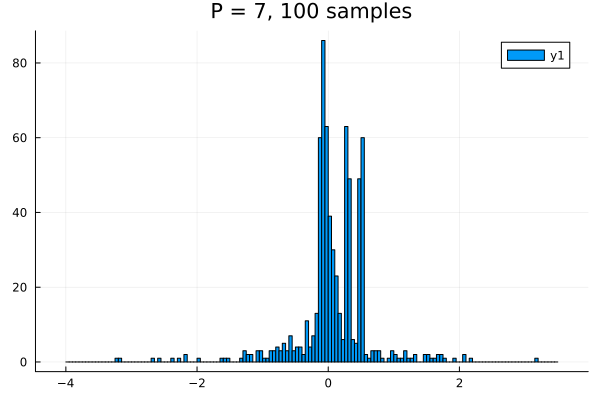

In [204]:
histogram(f7Record, bins=-4:0.05:3.5)
title!("P = 7, 100 samples")

## 2. Maximum-A-Posteriori Estimation

In [240]:
x = collect(-0.5:0.1:0.2)
e = randn(length(x)) * var
# xₘ = reshape(x, length(x), 1)
x = x'

X1 = [ones(size(x)),x]
X2 = [ones(size(x)),x,x.^2]
X7 = [ones(size(x)),x,x.^2, x.^3, x.^4, x.^5, x.^6, x.^7]
            
y = quadraticModel(x',e)

8-element Vector{Float64}:
 0.47423871649345545
 0.4208611580454966
 0.37501351510494196
 0.3392952677353795
 0.31500519014067885
 0.2993205002171863
 0.2952613025183965
 0.30041843923481887

missing: perform ridge regression, plot distributions